Загрузка набора данных. Вывод первых 5 строк датафрейма.

In [1]:
import pandas as pd
heart_data = pd.read_csv('1heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0


Предварительная обработка данных. \
С помощью метода info() осуществляется вывод информации о данных.

In [2]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


Преобразование столбца Cholesterol в числовой формат с заменой некорректных значений на NaN.

In [3]:
heart_data['Cholesterol'] = pd.to_numeric(heart_data['Cholesterol'], errors='coerce')

Проверка датасета на наличие пропусков с помощью метода isna(), подсчет пропусков с помощью метода sum().

In [4]:
heart_data.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,2
Cholesterol,2
FastingBS,0
RestingECG,1
MaxHR,1
ExerciseAngina,0
Oldpeak,0


Обработка пропущенных значений.

In [5]:
heart_data['RestingBP'].fillna(heart_data['RestingBP'].median(), inplace=True)
heart_data['Cholesterol'].fillna(heart_data['Cholesterol'].median(), inplace=True)
heart_data['MaxHR'].fillna(heart_data['MaxHR'].median(), inplace=True)
heart_data['RestingECG'].fillna(heart_data['RestingECG'].mode()[0], inplace=True)
heart_data.isna().sum()

/tmp/ipython-input-5-1002980722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data['RestingBP'].fillna(heart_data['RestingBP'].median(), inplace=True)
/tmp/ipython-input-5-1002980722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Типы данных проверены, изменены. Пропуски заполнены. \
Поиск явных дубликатов в данных.

In [6]:
print(heart_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
920     True
921     True
922    False
923    False
924    False
Length: 925, dtype: bool


Удаление найденныйх явных дубликатов.

In [7]:
heart_data = heart_data.drop_duplicates().reset_index(drop=True)
print(heart_data.duplicated().sum())

0


Явных дубликатов нет. \
Поиск неявных дубликатов.

In [8]:
print(heart_data['Sex'].unique())
print(heart_data['ChestPainType'].unique())
print(heart_data['RestingECG'].unique())
print(heart_data['ExerciseAngina'].unique())
print(heart_data['ST_Slope'].unique())

['M' 'F' 'Ma']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down' 'UP']


Удаление неявных дубликатов. Проверка.

In [9]:
heart_data['Sex'] = heart_data['Sex'].replace('Ma', 'M')
heart_data['ST_Slope'] = heart_data['ST_Slope'].replace('UP', 'Up')
print(heart_data['Sex'].unique())
print(heart_data['ST_Slope'].unique())

['M' 'F']
['Up' 'Flat' 'Down']


Вывод статистической сводки каждого столбца, содержащего числовые значения.

In [10]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,53.519001,132.412595,199.027144,0.232356,136.824104,0.885993,0.552660
std,9.418409,18.481460,109.315202,0.422564,25.437552,1.065522,0.497489
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Выявлены выбросы в столбцах RestingBP, Cholesterol, Oldpeak. Минимальное значение артериального давления не может быть 0. Замена значения 0 на медиану. Минимальное значение холестерина не может быть 0. Замена значения 0 на медиану. Минимальное значение изменения ST-сегмента на ЭКГ не может быть отрицательным (-2.6). Установление нижнего порога в 0. Повторный вывод сводки.

In [11]:
heart_data['RestingBP'] = heart_data['RestingBP'].replace(0, heart_data['RestingBP'].median())
heart_data['Cholesterol'] = heart_data['Cholesterol'].replace(0, heart_data['Cholesterol'].median())
heart_data['Oldpeak'] = heart_data['Oldpeak'].apply(lambda x: x if x >= 0 else 0)
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,53.519001,132.553746,240.673181,0.232356,136.824104,0.899891,0.552660
std,9.418409,17.958091,53.993464,0.422564,25.437552,1.044119,0.497489
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Выбор целевой переменной. В данном датасете целевая переменная - HeartDisease - указывает на наличие или отсутствие сердечного заболевания. HeartDisease принимает значения 0 (нет заболевания) или 1 (есть заболевание). Построение матрицы диаграмм рассеяния, выделение значения целевой переменной разными цветами.

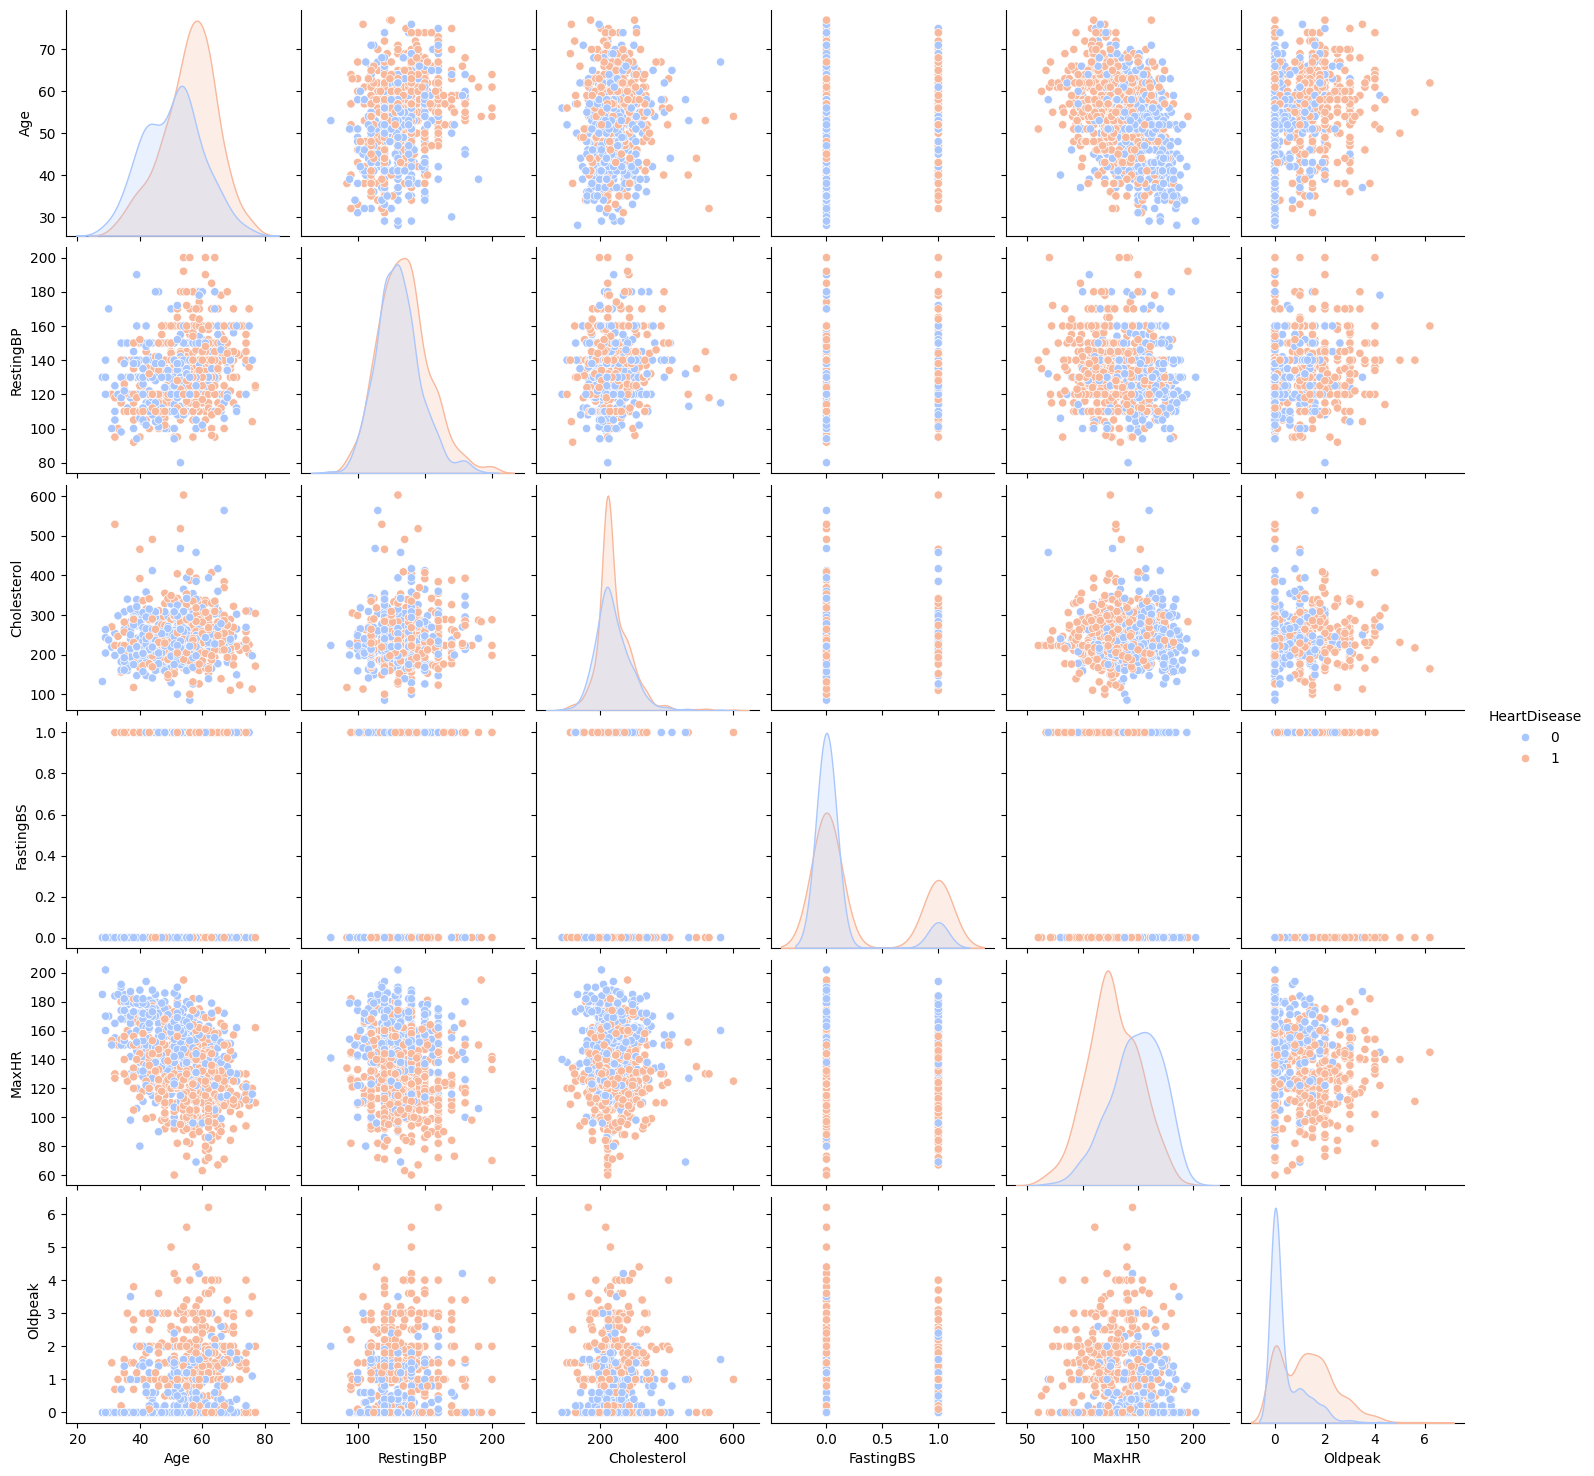

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
goal_var = 'HeartDisease'
numerical_features = heart_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove(goal_var)
sns.pairplot(heart_data[numerical_features + [goal_var]], hue=goal_var, palette='coolwarm')
plt.show()

На графике представлена матрица диаграмм рассеяния для набора данных. Синий цвет - пациенты без сердечного заболевания. Оранжевый цвет - пациенты с сердечным заболеванием. Гистограммы, расположенные по диагонали, показывают распределение значений отдельного признака. Например, основная масса значений RestingBP сгруппирована в диапазоне 120-150. Диаграммы рассеяния показывают взаимосвязь между двумя признаками. Age и MaxHR, у пациентов с сердечными заболеваниями (оранжевые точки) значения MaxHR чаще ниже, особенно у пожилых. У здоровых (синие точки) MaxHR чаще выше, даже при старшем возрасте. Cholesterol и Age, нет явного различия между группами по уровню холестерина в зависимости от возраста. Oldpeak и MaxHR, у пациентов с высоким Oldpeak (выше 2) почти всегда присутствует болезнь (оранжевые точки). У здоровых значения Oldpeak практически всегда ниже 2. FastingBS и RestingBP, большинство пациентов с высоким FastingBS (значение 1) имеют высокое давление, что указывает на потенциальный риск заболевания. \
Прежде чем начать исключение целевой переменной из модели, необходимо, путем копирования исходного датасета, создать новый датасет heart_data_new, во избежание изменений исходного датасета. Затем определяются категориальные и числовые признаки (categorical_features и numerical_features). Затем настраивается преобразователь ColumnTransformer, а именно применяется StandardScaler к столбцам из numerical_features, OneHotEncoder к столбцам из categorical_features (преобразуя их в набор бинарных столбцов).

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
heart_data_new = heart_data.copy()
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

Выделяются признаки X (все признаки, кроме целевой переменной HeartDisease) и целевая переменная y (HeartDisease). Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split. Преобразование тренировочных и тестовых данных.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = heart_data_new.drop(columns=['HeartDisease'])
y = heart_data_new['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Разработка предсказательной модели качественного отклика методом k- ближайших соседей. Создается и обучается модель на тренировочных данных. Выполняются предсказания на тестовом наборе данных.



In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)

Производится оценка ошибки классификации для метода k-ближайших соседей. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода k-ближайших соседей.

Accuracy: 0.851985559566787
Precision: 0.8771929824561403
Recall: 0.8823529411764706
Balanced Accuracy: 0.8430456294667399
F1 Score: 0.8797653958944281

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       107
           1       0.88      0.88      0.88       170

    accuracy                           0.85       277
   macro avg       0.84      0.84      0.84       277
weighted avg       0.85      0.85      0.85       277



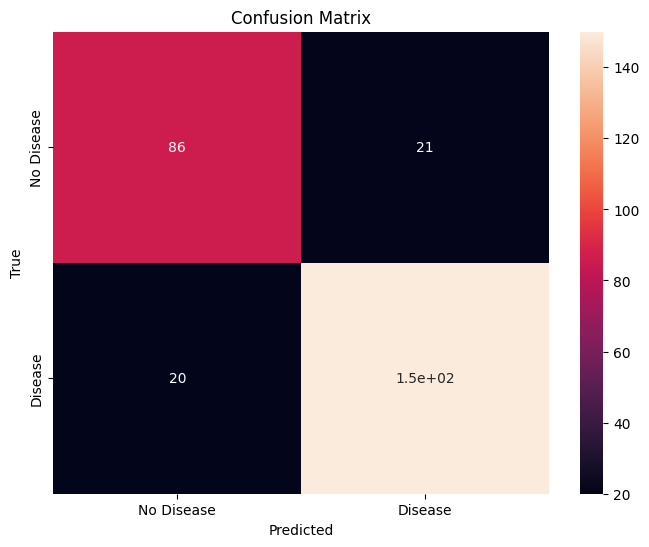

In [17]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:", accuracy)
print(f"Precision:", precision)
print(f"Recall:", recall)
print(f"Balanced Accuracy:", balanced_accuracy)
print(f"F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy (доля правильных ответов) равное 0.85 - это хорошее значение, которое показывает, что 85% предсказаний модели верны. \
Значение Precision 0.88 означает, что 88% людей, которых модель предсказала как больных, действительно оказались больными. \
Значение Recall равное 0.88 - высокая полнота для положительного класса (класс 1). Значение 0.88 означает, что модель смогла правильно классифицировать 88% всех людей с болезнью. \
Значение Balanced Accuracy равное 0.84 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. \
Значение F1 Score равное 0.88 означает, что модель хорошо сбалансировала точность и полноту. \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.81, полнота 0.80, F1-мера 0.81. Это довольно хорошие результаты, хотя для класса 0 точность и полнота немного ниже, чем для класса 1. \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.88, полнота 0.88, F1-мера 0.88. Эти показатели высокие, что означает, что модель хорошо справляется с предсказанием болезни. \
Macro average - это среднее значение метрик по всем классам, не взвешенное по количеству экземпляров в классе. Значения macro (0.84) показывают, что модель в целом сбалансирована. \
Weighted average - это среднее значение метрик, взвешенное по количеству экземпляров в каждом классе. Значения 0.85 также показывает хороший результат. \
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 86 означает, что 86 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. \
Верхняя правая ячейка (False Positive) - значение 21 означает, что модель ошибочно предсказала 21 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). \
Нижняя левая ячейка (False Negative) - значение 20 означает, что модель ошибочно предсказала 20 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease"). \
Нижняя правая ячейка (True Positive) - значение 150 означает, что 150 людей с болезнью (класс "Disease") были правильно предсказаны как больные. \
Модель достаточно хорошо различает здоровых и больных людей, так как большинство значений находятся в левой верхней ячейке и в правой нижней ячейке. \
Подбор гиперпараметров с помощью GridSearchCV для метода k-ближайших соседей с целью улучшения качества модели.


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 12),
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 20, 30, 40, 50],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knnG = KNeighborsClassifier()
grid_search = GridSearchCV(knnG, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'algorithm': 'ball_tree', 'leaf_size': 5, 'metric': 'manhattan', 'n_neighbors': 5}


Параметры, которые обеспечат наилучшую точность классификации.
Алгоритм для построения структуры ближайших соседей необходимо использовать ball_tree - эффективен для более сложных данных и подходит для задач с большим количеством признаков. Размер листа в дереве (leaf_size) должен быть равен 5. Меньшие значения этого параметра могут улучшить точность, но увеличивают время на построение дерева, в то время как большие значения ускоряют построение, но могут ухудшить точность. Манхэттенское расстояние лучше использовать как меру для вычисления расстояний между точками. Число ближайших соседей (n_neighbors) должно быть равное 5. \
Создание и обучение модели на тренировочных данных с учетом найденных параметров. Выполнение предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода k-ближайших соседей.

Accuracy: 0.855595667870036
Precision: 0.891566265060241
Recall: 0.8705882352941177
Balanced Accuracy: 0.8511819681143485
F1 Score: 0.8809523809523809

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       107
           1       0.89      0.87      0.88       170

    accuracy                           0.86       277
   macro avg       0.85      0.85      0.85       277
weighted avg       0.86      0.86      0.86       277



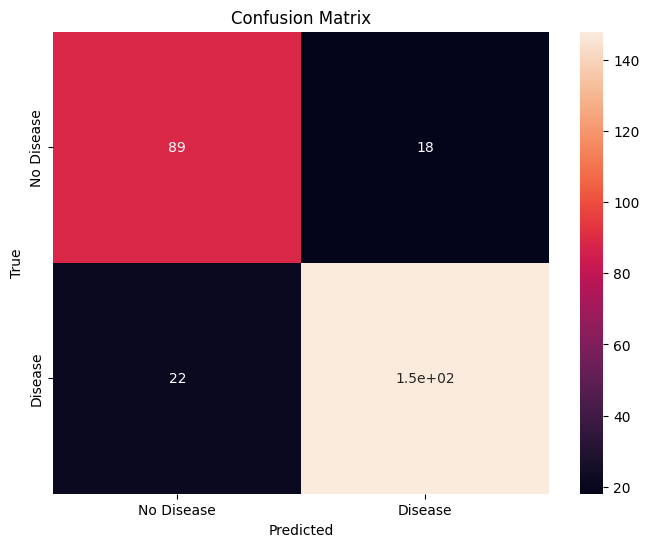

In [19]:
knn_best = KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=5, metric='manhattan')
knn_best.fit(X_train_transformed, y_train)
y_pred_best = knn_best.predict(X_test_transformed)

accuracy_knn_best = accuracy_score(y_test, y_pred_best)
precision_knn_best = precision_score(y_test, y_pred_best)
recall_knn_best = recall_score(y_test, y_pred_best)
balanced_accuracy_knn_best = balanced_accuracy_score(y_test, y_pred_best)
f1_knn_best = f1_score(y_test, y_pred_best)

print(f"Accuracy:", accuracy_knn_best)
print(f"Precision:", precision_knn_best)
print(f"Recall:", recall_knn_best)
print(f"Balanced Accuracy:", balanced_accuracy_knn_best)
print(f"F1 Score:", f1_knn_best)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

conf_matrix_knn_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_best, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy 0.856 говорит о том, что модель правильно классифицировала примерно 86% всех объектов. Что больше, чем в первом случае классификации данным методом (85%). \
Значение Precision 0.892 означает, что 89.2% людей, которых модель предсказала как больных, действительно оказались больными. Что больше, чем в первом случае классификации данным методом (88%). \
Значение Recall 0.871 говорит о том, что модель правильно определила 87.1% всех людей с болезнью. Что чуть меньше, чем в первом случае классификации данным методом (88%). \
Значение Balanced Accuracy равное 0.851 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. Что больше, чем в первом случае классификации данным методом (0.84). \
Значение F1 Score равное 0.881 означает, что модель хорошо сбалансировала точность и полноту. Что больше, чем в первом случае классификации данным методом (0.879). \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.80, полнота 0.83, F1-мера 0.82. Это довольно хорошие результаты, лучше чем в первом случае, но все отличаются от результатов, предсказанных для класса 1 (больные люди). \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.89, полнота 0.87, F1-мера 0.88. Эти показатели высокие, что означает, что модель хорошо справляется с предсказанием болезни. Однако результаты относительно предыдущей модели не сильно меняются, а полнота (Recall) даже чуть меньше, чем в 1 случае предсказаний модели для класса 1. \
Значения macro average (0.85) показывают, что модель в целом сбалансирована. \
Значения weighted average (0.86) также показывает хороший результат. \
Значения macro average и weighted average относительно предсказаний 1 модели показывают чуть лучше результаты. \
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 89 означает, что 89 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. В предсказаниях 1 модели были предсказаны правильно 86 человек. \
Верхняя правая ячейка (False Positive) - значение 18 означает, что модель ошибочно предсказала 18 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). Этот результат меньше, чем в пердсказаниях 1 модели (21 человек). \
Нижняя левая ячейка (False Negative) - значение 22 означает, что модель ошибочно предсказала 22 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease"). И это больше, чем в предсказаниях 1 модели (20 человек). \
Нижняя правая ячейка (True Positive) - значение 150 означает, что 150 людей с болезнью (класс "Disease") были правильно предсказаны как больные. В данном показатели работа модели первой (150) и с улучшенными парметрами одинаково. \
Модель достаточно хорошо различает здоровых и больных людей, так как большинство значений находятся в левой верхней ячейке и в правой нижней ячейке. \
Сравнение модели без улучшенных параметров и с улучшенными параметрами. В результате применения модели с новыми параметрами улучшилась точность (Precision) для класса "Disease". Улучшилась сбалансированная точность (Balanced Accuracy), улучшение составляет примерно 1.1, что говорит о более сбалансированном качестве классификации по обоим классам. Однако произошло небольшое снижение полноты (Recall) для больных людей, модель стала чуть хуже находить всех больных. \
Разработка предсказательной модели качественного отклика методом дерева решений. Создается и обучается модель на тренировочных данных. Выполняются предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода дерева решений.

Accuracy: 0.7833935018050542
Precision: 0.8716216216216216
Recall: 0.7588235294117647
Balanced Accuracy: 0.7906267179769104
F1 Score: 0.8113207547169812

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       107
           1       0.87      0.76      0.81       170

    accuracy                           0.78       277
   macro avg       0.78      0.79      0.78       277
weighted avg       0.80      0.78      0.79       277



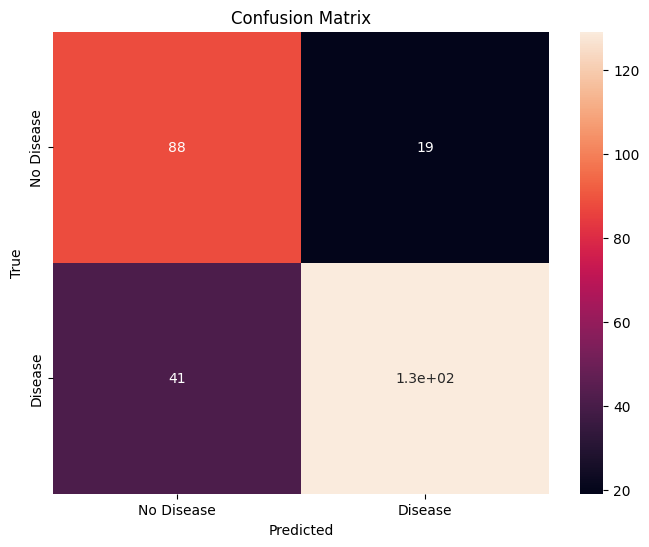

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_transformed, y_train)
y_pred_dtree = dtree.predict(X_test_transformed)

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
balanced_accuracy_dtree = balanced_accuracy_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)
print(f"Accuracy:", accuracy_dtree)
print(f"Precision:", precision_dtree)
print(f"Recall:", recall_dtree)
print(f"Balanced Accuracy:", balanced_accuracy_dtree)
print(f"F1 Score:", f1_dtree)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree))

conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtree, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy 0.78 говорит о том, что модель правильно классифицировала примерно 78% всех объектов. Это приемлемо, однако можно ожидать и более высоких результатов. \
Значение Precision 0.87 означает, что 87% людей, которых модель предсказала как больных, действительно оказались больными. Это хороший результат, указывающий на то, что модель точно предсказывает больных людей. \
Значение Recall 0.758 говорит о том, что модель правильно определила 75.8% всех людей с болезнью. \
Значение Balanced Accuracy равное 0.79 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. \
Значение F1 Score равное 0.81 означает, что модель хорошо сбалансировала точность и полноту. \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.68, полнота 0.82, F1-мера 0.75. Модель не всегда точно определяет здоровых людей, так как 68% из всех предсказанных здоровых на самом деле здоровы. Модель хорошо предсказывает здоровых людей, пропустив только 18% здоровых случаев. Результат по F1-мере не очень хороший, может быть и лучше. \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.87, полнота 0.76, F1-мера 0.81. Модель точно предсказывает больных людей. Модель пропускает около 24% случаев болезни. \
Значения macro average по Precision (0.78), Recall (0.79), F1 Score (0.78) показывают, что в целом модель справляется с классификацией, но есть области для улучшения. \
Значения weighted average по Precision (0.80), Recall (0.78), F1 Score (0.79) показывают, что модель в целом хорошо работает, но возможно также улучшение.\
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 88 означает, что 88 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. \
Верхняя правая ячейка (False Positive) - значение 19 означает, что модель ошибочно предсказала 19 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). \
Нижняя левая ячейка (False Negative) - значение 41 означает, что модель ошибочно предсказала 41 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease").  \
Нижняя правая ячейка (True Positive) - значение 130 означает, что 130 людей с болезнью (класс "Disease") были правильно предсказаны как больные.  \
Модель в целом демонстрирует хорошие результаты, особенно в плане точности для предсказания больных людей. Однако, есть некоторые проблемы с False Positives и False Negatives, что требует дополнительной настройки модели и ее параметров с помощью GridSearchCV. \
Подбор гиперпараметров с помощью GridSearchCV для метода дерева решений с целью улучшения качества модели.

In [21]:
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
    'splitter': ['best', 'random']
}
dtreeG = DecisionTreeClassifier(random_state=42)
grid_search_dtree = GridSearchCV(dtreeG, param_grid_dtree, cv=5, scoring='accuracy')
grid_search_dtree.fit(X_train_transformed, y_train)
print("Лучшие параметры:", grid_search_dtree.best_params_)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}


В результате были подобраны новые параметры для выполнения классификации методом дерева решений. Критерий "Gini" был выбран в качестве оптимального для разделения узлов дерева. Это стандартный критерий для метода деревьев решений и хорошо подходит для большинства задач классификации. Глубина дерева была ограничена значением 3. Ограничение глубины дерева помогает предотвратить переобучение. Параметр "splitter" определяет стратегию выбора признака для разделения узлов. Значение 'best' указывает, что на каждом шаге алгоритм будет выбирать лучший признак для разделения. \
Создание и обучение модели на тренировочных данных с учетом найденных параметров. Выполнение предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода дерева решений.

Accuracy: 0.8339350180505415
Precision: 0.8974358974358975
Recall: 0.8235294117647058
Balanced Accuracy: 0.836998350742166
F1 Score: 0.8588957055214724

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       107
           1       0.90      0.82      0.86       170

    accuracy                           0.83       277
   macro avg       0.82      0.84      0.83       277
weighted avg       0.84      0.83      0.84       277



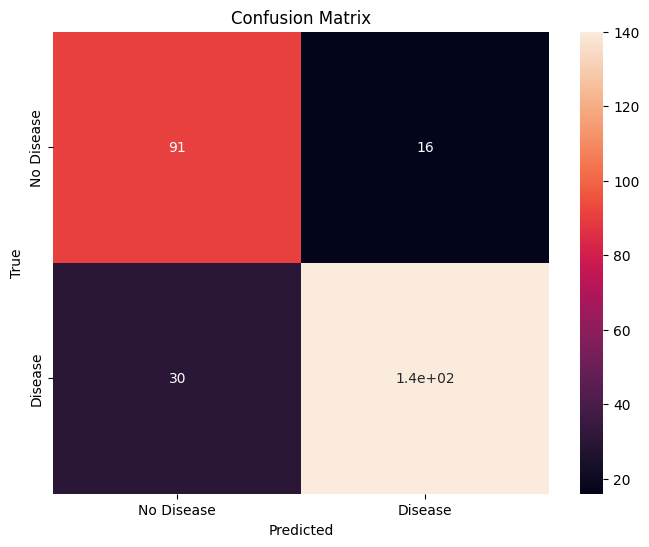

In [22]:
dtree_best = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=42)
dtree_best.fit(X_train_transformed, y_train)
y_pred_dtree_best = dtree_best.predict(X_test_transformed)

accuracy_dtree_best = accuracy_score(y_test, y_pred_dtree_best)
precision_dtree_best = precision_score(y_test, y_pred_dtree_best)
recall_dtree_best = recall_score(y_test, y_pred_dtree_best)
balanced_accuracy_dtree_best = balanced_accuracy_score(y_test, y_pred_dtree_best)
f1_dtree_best = f1_score(y_test, y_pred_dtree_best)
print(f"Accuracy:", accuracy_dtree_best)
print(f"Precision:", precision_dtree_best)
print(f"Recall:", recall_dtree_best)
print(f"Balanced Accuracy:", balanced_accuracy_dtree_best)
print(f"F1 Score:", f1_dtree_best)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtree_best))

conf_matrix_dtree_best = confusion_matrix(y_test, y_pred_dtree_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtree_best, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy 0.83 говорит о том, что модель правильно классифицировала примерно 83% всех объектов. Это хороший результат, значение выше чем в 1 случе предсказании модели дерева решений (0.78). Однако значение попрежнему ниже, чем у медели k-ближайших соседей (0.856). \
Значение Precision 0.897 означает, что 89.7% людей, которых модель предсказала как больных, действительно оказались больными. Это хороший результат, лучше чем в 1 случае предсказании модели дерева решений, а также лучше чем в случае с моделью k-ближайших соседей (0.892). \
Значение Recall 0.82 говорит о том, что модель правильно определила 82% всех людей с болезнью. Этот результат значительно выше, чем в 1 случае предсказания модели дерева решений (0.758), однако ниже чем у метода k-ближайших соседей (0.871). \
Значение Balanced Accuracy равное 0.84 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. Этот результат выше чем в 1 случае модели дерева решений (0.79), однако чуть ниже чем в случае с методом k-ближайших соседей (0.85). \
Значение F1 Score равное 0.86 означает, что модель хорошо сбалансировала точность и полноту. Это значение выше чем в 1 случае метода дерева решений (0.81), однако чуть ниже чем у метода k-ближайших соседей (0.88). \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.75, полнота 0.85, F1-мера 0.80. Модель попрежнему не всегда точно определяет здоровых людей, так как 75% из всех предсказанных здоровых на самом деле здоровы. Модель хорошо предсказывает здоровых людей, пропустив только 15% здоровых случаев. Результат по F1-мере вполне хороший. результаты стали лучше относительно 1 случая метода дерева решений. \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.90, полнота 0.82, F1-мера 0.86. Модель точно предсказывает больных людей. Модель пропускает около 18% случаев болезни. Результаты стали лучше с использованием новых параметров.
Значения macro average по Precision (0.82), Recall (0.84), F1 Score (0.83) показывают, что в целом модель справляется с классификацией. Однако результаты попрежнему менее эффективны относительно метода k-ближайших соседей.
Значения weighted average по Precision (0.84), Recall (0.83), F1 Score (0.84) показывают, что модель в целом хорошо работает, однако результаты попрежнему менее эффективны относительно метода k-ближайших соседей.  \
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 91 означает, что 91 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. Значение улучшилось после применения новых параметров. \
Верхняя правая ячейка (False Positive) - значение 16 означает, что модель ошибочно предсказала 16 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). Значение также стало лучше относительно 1 случая метода дерева решений. \
Нижняя левая ячейка (False Negative) - значение 30 означает, что модель ошибочно предсказала 30 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease"). Значение также стало лучше с применением к модели новых параметров. \
Нижняя правая ячейка (True Positive) - значение 140 означает, что 140 людей с болезнью (класс "Disease") были правильно предсказаны как больные. Также значение стало лучше с применением к модели новых параметров. \
Из данных результатов можно сделать вывод, что применение к модели новых параметров увеличило эффективность работы модели. Каждая метрика претерпела небольшие улучшения. Однако метод древа решений показывает результаты хуже чем метод k-ближайших соседей. В данном сравнении метод k-ближайших соседей является более эффективным. \
Разработка предсказательной модели качественного отклика методом логистической регрессии. Создается и обучается модель на тренировочных данных. Выполняются предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода логистическая регрессия.

Accuracy: 0.8592057761732852
Precision: 0.906832298136646
Recall: 0.8588235294117647
Balanced Accuracy: 0.8593183067619571
F1 Score: 0.8821752265861027

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       107
           1       0.91      0.86      0.88       170

    accuracy                           0.86       277
   macro avg       0.85      0.86      0.85       277
weighted avg       0.86      0.86      0.86       277



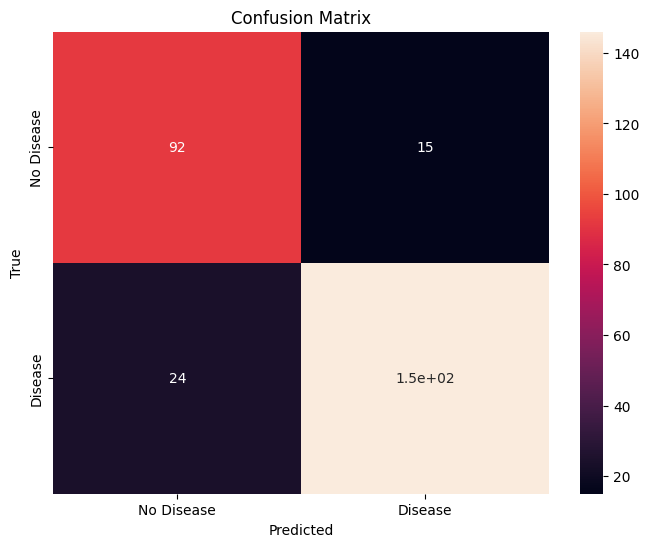

In [23]:
from sklearn.linear_model import LogisticRegression
LRegression = LogisticRegression()
LRegression.fit(X_train_transformed, y_train)
y_pred_LR = LRegression.predict(X_test_transformed)

accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)
balanced_accuracy_LR = balanced_accuracy_score(y_test, y_pred_LR)
f1_LR = f1_score(y_test, y_pred_LR)
print(f"Accuracy:", accuracy_LR)
print(f"Precision:", precision_LR)
print(f"Recall:", recall_LR)
print(f"Balanced Accuracy:", balanced_accuracy_LR)
print(f"F1 Score:", f1_LR)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR))

conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy 0.86 говорит о том, что модель правильно классифицировала примерно 86% всех объектов. Это достаточно хороший результат. \
Значение Precision 0.91 означает, что 91% людей, которых модель предсказала как больных, действительно оказались больными. Это очень хороший результат, указывающий на то, что модель достаточно точно предсказывает больных людей. \
Значение Recall 0.858 говорит о том, что модель правильно определила 85.8% всех людей с болезнью, что является хорошим результатом работы модели. \
Значение Balanced Accuracy равное 0.86 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. \
Значение F1 Score равное 0.88 означает, что модель хорошо сбалансировала точность и полноту. \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.79, полнота 0.86, F1-мера 0.83. Модель не всегда точно определяет здоровых людей, так как 79% из всех предсказанных здоровых на самом деле здоровы. Модель хорошо предсказывает здоровых людей, пропустив только 14% здоровых случаев. Результат по F1-мере достаточно хороший, но может быть и лучше. \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.91, полнота 0.86, F1-мера 0.88. Модель достаточно точно предсказывает больных людей. Модель пропускает около 14% случаев болезни, что вполне приемлимо. Результат по F1-мере достаточно хороший. \
Значения macro average по Precision (0.85), Recall (0.86), F1 Score (0.85) показывают, что в целом модель справляется с классификацией, но есть возможность для улучшения. \
Значение weighted average (0.86) показывает, что модель в целом хорошо работает, но возможно также улучшение.\
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 92 означает, что 92 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. \
Верхняя правая ячейка (False Positive) - значение 15 означает, что модель ошибочно предсказала 15 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). \
Нижняя левая ячейка (False Negative) - значение 24 означает, что модель ошибочно предсказала 24 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease").  \
Нижняя правая ячейка (True Positive) - значение 150 означает, что 150 людей с болезнью (класс "Disease") были правильно предсказаны как больные.  \
Модель демонстрирует достаточно хорошие результаты, в особенности сравнения с методом дерева решений. Однако, есть возможность для улучшения значений, что требует дополнительной настройки модели и ее параметров с помощью GridSearchCV. \
Подбор гиперпараметров с помощью GridSearchCV для метода логистической регрессии с целью улучшения качества модели.

In [24]:
param_grid_LR = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'random_state': [42]
    }
LRegressionG = LogisticRegression()
grid_search_LR = GridSearchCV(LRegressionG, param_grid_LR, cv=5, scoring='accuracy')
grid_search_LR.fit(X_train_transformed, y_train)
print("Лучшие параметры:", grid_search_LR.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Лучшие параметры: {'max_iter': 100, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.71254e-18): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing th

В результате были подобраны следующие параметры для выполнения классификации методом логистической регрессии. Регуляризация L2 которая помогает предотвратить переобучение. Итеративный метод оптимизации lbfgs, подходящий для небольших и средних наборов данных Максимальное количество итераций для сходимости алгоритма равное 100. Фиксированный случайный начальный параметр random_state: 42. \
Создание и обучение модели на тренировочных данных с учетом найденных параметров. Выполнение предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score". Построение матрицы неточностей с помощью confusion_matrix для метода логистической регрессии.




Accuracy: 0.8592057761732852
Precision: 0.906832298136646
Recall: 0.8588235294117647
Balanced Accuracy: 0.8593183067619571
F1 Score: 0.8821752265861027

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       107
           1       0.91      0.86      0.88       170

    accuracy                           0.86       277
   macro avg       0.85      0.86      0.85       277
weighted avg       0.86      0.86      0.86       277



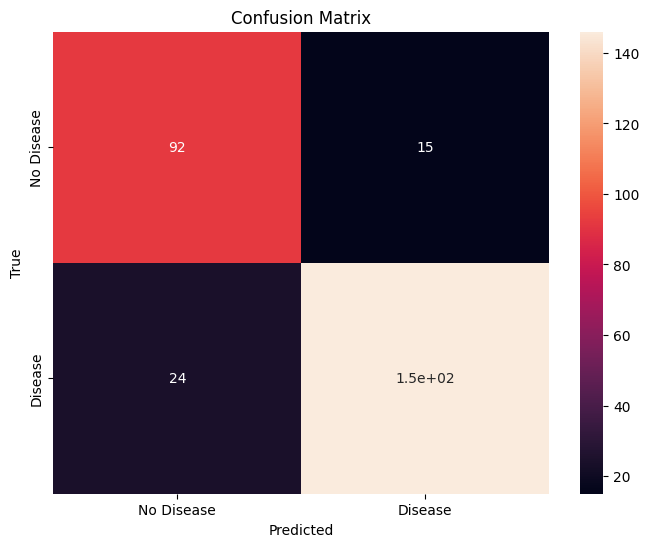

In [25]:
LRegression_best = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100, random_state=42)
LRegression_best.fit(X_train_transformed, y_train)
y_pred_LR_best = LRegression_best.predict(X_test_transformed)

accuracy_LR_best = accuracy_score(y_test, y_pred_LR_best)
precision_LR_best = precision_score(y_test, y_pred_LR_best)
recall_LR_best = recall_score(y_test, y_pred_LR_best)
balanced_accuracy_LR_best = balanced_accuracy_score(y_test, y_pred_LR_best)
f1_LR_best = f1_score(y_test, y_pred_LR_best)
print(f"Accuracy:", accuracy_LR_best)
print(f"Precision:", precision_LR_best)
print(f"Recall:", recall_LR_best)
print(f"Balanced Accuracy:", balanced_accuracy_LR_best)
print(f"F1 Score:", f1_LR_best)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR_best))

conf_matrix_LR_best = confusion_matrix(y_test, y_pred_LR_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_LR_best, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Полученные (в результате создания, обучения, предсказания модели с учетом полученных оптимальных параметров) значения метрик, а также матрица ошибок, не имеют отличий с значениями метрик и матрицой ошибок в 1 случае обучения модели логистической регресии. Причина в том, что параметры, заложенные по умолчанию в метод LogisticRegression() и являются теми параметрами, которые были найдены при помощи GridSearchCV. Не считая параметра random_state, по умолчанию он None. Однако из-за используемого по умолчанию параметра алгоритма "lbfgs", который не использует случайные числа, random_state не влияет на поведение модели. \
Так как оптимизации параметров не случилось, можно провести сравнение работы модели логистической регрессии с параметрами по умолчанию и работ моделей с оптимизированными параметрами k-ближайщих соседей и дерева решений. \
Модель k-ближайщих соседей с оптимизированными параметрами и модель логистической регрессии. Модель логистической регрессии слегка лучше работает, это можно увидеть из анализа метрик. Accuracy обеих моделей очень близка (логистическая регрессия 0.8592 и метод k-ближайших соседей 0.8556), с небольшим преимуществом у логистической регрессиия. Логистическая регрессия также немного лучше по precision (0.9068 против 0.8916). Это означает, что она немного лучше классифицирует положительные примеры (класс 1), предотвращая ложные срабатывания. Метод ближайших соседей немного превосходит по recall (0.8706 против 0.8588), что указывает на лучшее нахождение положительных примеров (класс 1). Логистическая регрессия также имеет небольшое преимущество по сбалансированной точности (0.8593 против 0.8512). Обе модели дают очень схожий результат по F1-мере (логистическая регрессия 0.8822 и метод k-ближайших соседей 0.8810), что говорит о хорошем балансе между точностью и полнотой. Если рассматривать матрицу ошибок, то логистическая регрессия незначильно, но все же показывает результаты лучше. Значения True Negative, False Positive а также False Negative на 1-2 единицы в лучшую сторону отличаются от метода k-ближайших соседей. \
Если говорить о сравнении метрик и матрицы ошибок моделей дерева решений и логистической регрессии, то можно сразу сделать вывод о большей эффективности второй. Так как уже было проведено сравнение работы модели дерева решений с моделью k-ближайших соседей, выяснено, что модель дерева решений хуже справляется с классификацией на данном датасете, даже с учетом подобранных оптимальных параметров. \
Разработка предсказательной модели качественного отклика методом случайный лес. Создается и обучается модель на тренировочных данных. Выполняются предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода случайный лес.

Accuracy: 0.8592057761732852
Precision: 0.896969696969697
Recall: 0.8705882352941177
Balanced Accuracy: 0.8558548653106102
F1 Score: 0.8835820895522388

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       107
           1       0.90      0.87      0.88       170

    accuracy                           0.86       277
   macro avg       0.85      0.86      0.85       277
weighted avg       0.86      0.86      0.86       277



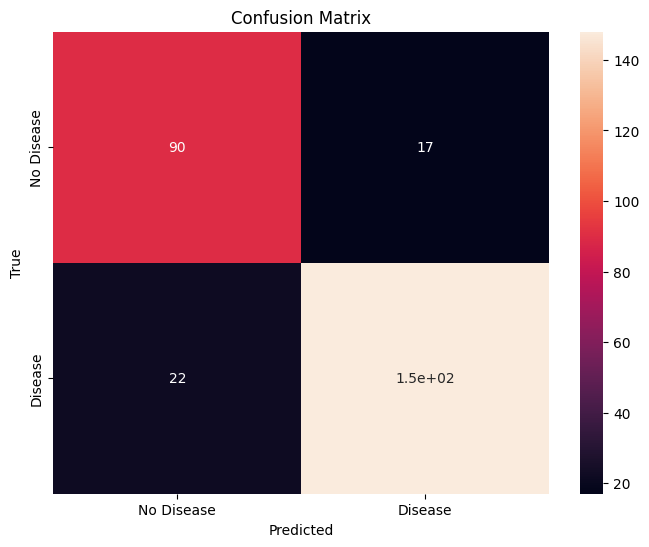

In [26]:
from sklearn.ensemble import RandomForestClassifier
RForest = RandomForestClassifier(random_state=42)
RForest.fit(X_train_transformed, y_train)
y_pred_forest = RForest.predict(X_test_transformed)

accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest)
recall_forest = recall_score(y_test, y_pred_forest)
balanced_accuracy_forest = balanced_accuracy_score(y_test, y_pred_forest)
f1_forest = f1_score(y_test, y_pred_forest)
print(f"Accuracy:", accuracy_forest)
print(f"Precision:", precision_forest)
print(f"Recall:", recall_forest)
print(f"Balanced Accuracy:", balanced_accuracy_forest)
print(f"F1 Score:", f1_forest)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy 0.86 говорит о том, что модель правильно классифицировала примерно 86% всех объектов. Это достаточно хороший результат. \
Значение Precision 0.90 означает, что 90% людей, которых модель предсказала как больных, действительно оказались больными. Это очень хороший результат, указывающий на то, что модель достаточно точно предсказывает больных людей. \
Значение Recall 0.87 говорит о том, что модель правильно определила 87% всех людей с болезнью, что является хорошим результатом работы модели. \
Значение Balanced Accuracy равное 0.85 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. \
Значение F1 Score равное 0.88 означает, что модель хорошо сбалансировала точность и полноту. \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.80, полнота 0.84, F1-мера 0.82. Модель не всегда точно определяет здоровых людей, так как лишь 80% из всех предсказанных здоровых на самом деле здоровы. Модель хорошо предсказывает здоровых людей, пропустив только 16% здоровых случаев. Результат по F1-мере достаточно хороший, но может быть и лучше. \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.90, полнота 0.87, F1-мера 0.88. Модель достаточно точно предсказывает больных людей. Модель пропускает около 13% случаев болезни, что вполне приемлимо. Результат по F1-мере достаточно хороший. \
Значения macro average по Precision (0.85), Recall (0.86), F1 Score (0.85) показывают, что в целом модель справляется с классификацией, но есть возможность для улучшения. \
Значение weighted average (0.86) показывает, что модель в целом хорошо работает, но возможно также улучшение.\
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 90 означает, что 90 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. \
Верхняя правая ячейка (False Positive) - значение 17 означает, что модель ошибочно предсказала 17 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). \
Нижняя левая ячейка (False Negative) - значение 22 означает, что модель ошибочно предсказала 22 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease").  \
Нижняя правая ячейка (True Positive) - значение 150 означает, что 150 людей с болезнью (класс "Disease") были правильно предсказаны как больные.  \
Модель демонстрирует достаточно хорошие результаты, на уровне с моделями k-ближайших соседей (с учетом оптимизированных параметров) и логистической регрессии. Однако, есть есть возможность для улучшения значений, что требует дополнительной настройки модели и ее параметров с помощью GridSearchCV. \
Подбор гиперпараметров с помощью GridSearchCV для метода случайный лес с целью улучшения качества модели.

In [27]:
param_grid_forest = {
    'n_estimators': [2, 3, 4, 5, 10, 20, 50, 70, 100, 150],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 15],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
    }
RForestG = RandomForestClassifier()
grid_search_forest = GridSearchCV(RForestG, param_grid_forest, cv=5, scoring='accuracy')
grid_search_forest.fit(X_train_transformed, y_train)
print("Лучшие параметры:", grid_search_forest.best_params_)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50, 'random_state': 42}


В результате были подобраны новые параметры для выполнения классификации методом логистической регрессии. Использование индекса Джини в качестве критерия разбиения узлов дерева. Это параметр по умолчанию. Глубина дерева ограничена 6 уровнями. Это указывает на то, что модель будет менее сложной и будет учитывать только 6 уровней разбиений, что помогает предотвратить переобучение. Количество деревьев в лесу установлено на уровне 50. Это число определяет, сколько деревьев будет строиться в случайном лесе.  Установка фиксированного значения для случайных чисел random_state: 42. \
Создание и обучение модели на тренировочных данных с учетом найденных параметров. Выполнение предсказания на тестовом наборе данных. Подсчет метрик "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score'. Построение матрицы неточностей с помощью confusion_matrix для метода случайный лес.

Accuracy: 0.8664259927797834
Precision: 0.9030303030303031
Recall: 0.8764705882352941
Balanced Accuracy: 0.8634689389774601
F1 Score: 0.8895522388059701

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       107
           1       0.90      0.88      0.89       170

    accuracy                           0.87       277
   macro avg       0.86      0.86      0.86       277
weighted avg       0.87      0.87      0.87       277



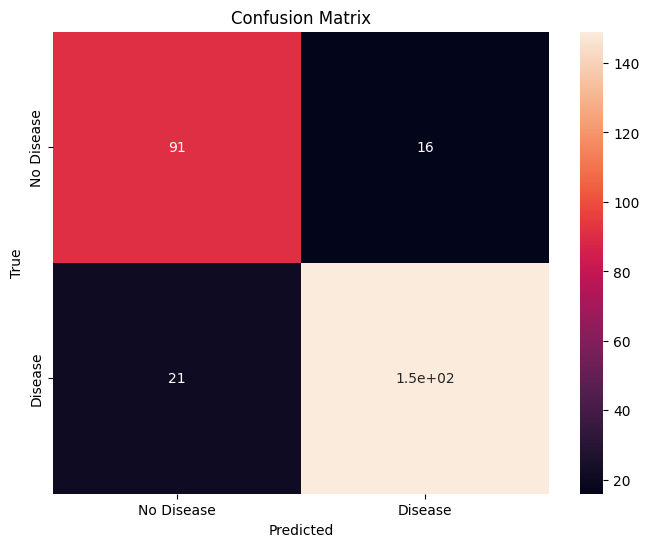

In [28]:
RForest_best = RandomForestClassifier(criterion='gini', max_depth=6, n_estimators=50, random_state=42)
RForest_best.fit(X_train_transformed, y_train)
y_pred_forest_best = RForest_best.predict(X_test_transformed)

accuracy_forest_best = accuracy_score(y_test, y_pred_forest_best)
precision_forest_best = precision_score(y_test, y_pred_forest_best)
recall_forest_best = recall_score(y_test, y_pred_forest_best)
balanced_accuracy_forest_best = balanced_accuracy_score(y_test, y_pred_forest_best)
f1_forest_best = f1_score(y_test, y_pred_forest_best)
print(f"Accuracy:", accuracy_forest_best)
print(f"Precision:", precision_forest_best)
print(f"Recall:", recall_forest_best)
print(f"Balanced Accuracy:", balanced_accuracy_forest_best)
print(f"F1 Score:", f1_forest_best)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest_best))

conf_matrix_forest_best = confusion_matrix(y_test, y_pred_forest_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest_best, annot=True, xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Значение Accuracy 0.87 говорит о том, что модель правильно классифицировала примерно 87% всех объектов. Это достаточно хороший результат, лучше чем без использования оптимальных параметров (0.86). \
Значение Precision 0.903 означает, что 90% людей, которых модель предсказала как больных, действительно оказались больными. Это очень хороший результат, указывающий на то, что модель достаточно точно предсказывает больных людей. Этот результат также близок к случае без подбора оптимальных параметров, однако чуть выше (0.896) \
Значение Recall 0.8764 говорит о том, что модель правильно определила 87% всех людей с болезнью, что является хорошим результатом работы модели, а также незначительно выше, чем работа модели без оптимальных параметров (0.8705). \
Значение Balanced Accuracy равное 0.86 показывает, что модель имеет хорошие результаты как для одного, так и для другого класса. \
Значение F1 Score равное 0.89 означает, что модель хорошо сбалансировала точность и полноту. \
Анализ Classification Report (отчета классификации). \
Precision, Recall, F1-Score для класса 0 (здоровые люди). Точность 0.81, полнота 0.85, F1-мера 0.83. Модель не всегда точно определяет здоровых людей, так как лишь 81% из всех предсказанных здоровых на самом деле здоровы. Модель хорошо предсказывает здоровых людей, пропустив только 15% здоровых случаев. Результат по F1-мере достаточно хороший. Также, данные результаты на 0.01 превосходят результаты модели без использования оптимальных параметров. \
Precision, Recall, F1-Score для класса 1 (больные люди). Точность 0.90, полнота 0.88, F1-мера 0.89. Модель достаточно точно предсказывает больных людей. Модель пропускает около 12% случаев болезни, что вполне приемлимо. Результат по F1-мере достаточно хороший. \
Значения macro average (0.86) показывают, что в целом модель справляется с классификацией, также чуть лучше справляется относительно модели без подобранных параметров. \
Значение weighted average (0.87) показывает, что модель в целом хорошо работает.\
Анализ матрицы ошибок. \
Верхняя левая ячейка (True Negative) - значение 91 означает, что 91 человек, у которых действительно не было болезни (класс "No Disease"), были правильно предсказаны как здоровые. \
Верхняя правая ячейка (False Positive) - значение 16 означает, что модель ошибочно предсказала 16 человека как здорового, хотя на самом деле у них была болезнь (класс "Disease"). \
Нижняя левая ячейка (False Negative) - значение 21 означает, что модель ошибочно предсказала 21 человек как больных, хотя на самом деле они были здоровыми (класс "No Disease").  \
Нижняя правая ячейка (True Positive) - значение 150 означает, что 150 людей с болезнью (класс "Disease") были правильно предсказаны как больные.  \
Модель демонстрирует достаточно хорошие результаты, лучше чем модель без использования параметров. Увеличилась точность, полнота и другие параметры. В целом модель стала более эффективно классифицировать. \
Также если сравнивать работу данной модели с работой моделей, описанных выше, можно сделать следующие выводы. \
Лучший результат по метрике Accuracy показала модель случайного леса (0.87), немного опередив логистическую регрессию (0.86) и метод k-ближайших соседей (0.856). Дерево решений продемонстрировало наименьшую точность (0.83), несмотря на улучшения после подбора параметров. \
Наиболее высокую точность показала логистическая регрессия (0.91), что говорит о минимальном числе ложноположительных срабатываний. Метод случайного леса близок к этому показателю (0.903), а k-ближайшие соседи и дерево решений показали чуть меньшие значения (0.892 и 0.897, соответственно). \
Метод k-ближайших соседей обеспечил лучший результат по полноте (0.871), что означает лучшее обнаружение всех положительных случаев (класс 1). Случайный лес и логистическая регрессия немного уступают (0.8764 и 0.858), а дерево решений показывает наименьший показатель (0.82). \
Методы случайного леса и логистической регрессии достигли почти одинакового результата (0.86), который чуть выше значения у k-ближайших соседей (0.851) и дерева решений (0.84). \
Лучшим по F1-мере стал случайный лес (0.89), отражая сбалансированное сочетание точности и полноты. k-ближайшие соседи и логистическая регрессия продемонстрировали схожие результаты (0.88), а дерево решений снова показал худший результат среди всех имеющихся (0.86). \
В общем, лучшие результаты показал метод случайного леса, демонстрируя высокую точность, сбалансированность, и качество классификации. Метод k-ближайших соседей и логистическая регрессия оказались схожими в результатах, а дерево решений оказалось хуже остальных методов по большинству показателей. \
Построение графиков ROC-кривой для каждого метода на одном графике для сравнения.

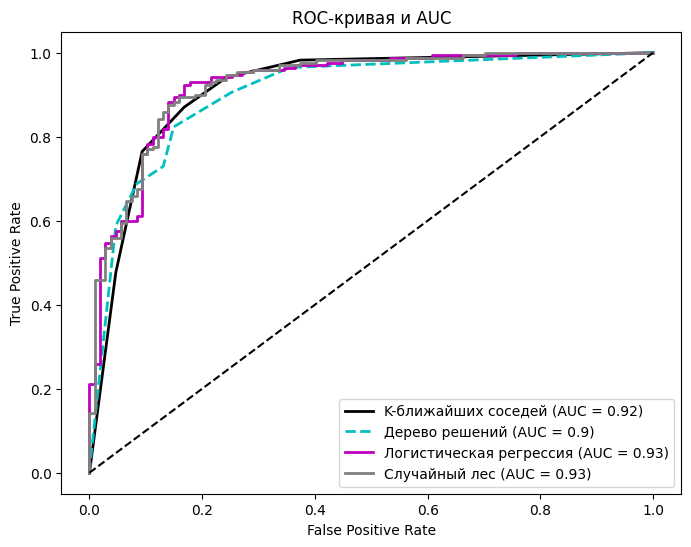

In [29]:
from sklearn.metrics import roc_curve, auc

fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test, knn_best.predict_proba(X_test_transformed)[:, 1])
fpr_tree_best, tpr_tree_best, _ = roc_curve(y_test, dtree_best.predict_proba(X_test_transformed)[:, 1])
fpr_logistic_best, tpr_logistic_best, _ = roc_curve(y_test, LRegression_best.predict_proba(X_test_transformed)[:, 1])
fpr_forest_best, tpr_forest_best, _ = roc_curve(y_test, RForest_best.predict_proba(X_test_transformed)[:, 1])

roc_auc_knn  = auc(fpr_knn_best, tpr_knn_best)
roc_auc_tree_best  = auc(fpr_tree_best, tpr_tree_best)
roc_auc_logistic_best  = auc(fpr_logistic_best, tpr_logistic_best)
roc_auc_forest_best  = auc(fpr_forest_best, tpr_forest_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_best, tpr_knn_best, label=f'K-ближайших соседей (AUC = {round(roc_auc_knn,2)})', color = 'black',linestyle = '-',linewidth = 2)
plt.plot(fpr_tree_best, tpr_tree_best, label=f'Дерево решений (AUC = {round(roc_auc_tree_best,2)})', color = 'c',linestyle = '--',linewidth = 2)
plt.plot(fpr_logistic_best, tpr_logistic_best, label=f'Логистическая регрессия (AUC = {round(roc_auc_logistic_best,2)})', color = 'm',linestyle = '-',linewidth = 2)
plt.plot(fpr_forest_best, tpr_forest_best, label=f'Случайный лес (AUC = {round(roc_auc_forest_best,2)})', color = 'gray',linestyle = '-',linewidth = 2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая и AUC')
plt.legend()
plt.show()

На данном графике ROC-кривой есть есть 4 кривых, соответствующие различным моделям. Линия k-ближайших соседей расположена довольно высоко и близко к верхнему левому углу, что говорит о хорошем качестве классификации модели. AUC 0.92 указывает на высокую способность модели различать положительные и отрицательные классы. Модель дерева решений имеет чуть более низкую AUC по сравнению с k-ближайшими соседями (0.9 против 0.92), что также указывает на довольно хорошее качество, но она хуже, чем KNN. Тем не менее, линия все еще близка к верхнему левому углу, можно сказать, что дерево решений работает достаточно хорошо. Модель логистической регрессии показывает наилучшие результаты с AUC 0.93, что говорит о высокой эффективности классификации. Линия достаточно близка к идеальному положению, что означает, что модель точно предсказывает результаты. Модель случайного леса также демонстрирует хорошую производительность с AUC 0.93, что аналогично логистической регрессии. Линия случайного леса близка к идеальной, что говорит о высоком качестве модели.
